# Join parquet Files

Import Libraries

In [1]:
import pyarrow.parquet as pq
import os
import pandas as pd
from pathlib import Path

Concate Parquets

In [2]:
def concate_parquet(directory_path):

    # Get a list of Parquet files in the directory
    Get a list of Parquet files in the directory
    parquet_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.parquet')]

    # Initialize an empty list to store DataFrames
    dfs = []

    # Iterate through each Parquet file
    for file in parquet_files:
        # Read the Parquet file into a DataFrame
        df = pq.read_table(file).to_pandas()
        
        # Extract the substring before the underscore from the filename
        filename = os.path.basename(file)
        appid = filename.split('_')[0]
        
        # Add a new column with the extracted prefix value
        df['AppId'] = appid
        
        # Append the modified DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into one
    concatenated_df = pd.concat(dfs, ignore_index=True)

    return concatenated_df


In [3]:
parquets_df = concate_parquet('./data/parquets/')
parquets_df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location,AppId,timestamp_dev_responded,developer_response
0,164992248,"{'steamid': '76561198339039799', 'num_games_ow...",english,"Got this when it's 76% off, it was a good off....",1.715264e+09,1.715264e+09,True,0.0,0.0,0,0.0,True,False,False,True,,1000760,NaN,NaN
1,164442866,"{'steamid': '76561198983468418', 'num_games_ow...",english,very fun,1.714893e+09,1.714893e+09,True,0.0,0.0,0,0.0,True,False,False,True,,1000760,NaN,NaN
2,164003442,"{'steamid': '76561198000964997', 'num_games_ow...",english,"I really wanted to like this game, I really di...",1.714584e+09,1.714584e+09,False,1.0,0.0,0.522613048553466797,0.0,True,False,False,True,,1000760,NaN,NaN
3,162085671,"{'steamid': '76561198034437023', 'num_games_ow...",english,Fun pretty linear action game. combat is prett...,1.712118e+09,1.712118e+09,True,0.0,0.0,0,0.0,True,False,False,True,,1000760,NaN,NaN
4,162067131,"{'steamid': '76561199466323974', 'num_games_ow...",english,Indonesia:\nDesain peta yang tidak biasa.\nKem...,1.712096e+09,1.712096e+09,True,0.0,0.0,0,0.0,True,False,False,True,,1000760,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269807,48266255,"{'steamid': '76561198001876420', 'num_games_ow...",english,This game will likely draw a lot of comparison...,1.547261e+09,1.547261e+09,True,13.0,0.0,0.544656097888946533,0.0,True,False,True,False,,994220,NaN,NaN
8269808,48257776,"{'steamid': '76561198059126249', 'num_games_ow...",english,Developer responded quickly to complains about...,1.547232e+09,1.547615e+09,True,6.0,0.0,0.513300180435180664,1.0,True,False,True,False,,994220,NaN,NaN
8269809,48255767,"{'steamid': '76561198085196288', 'num_games_ow...",english,Great game for Early Access. Very nice and pol...,1.547225e+09,1.547225e+09,True,3.0,1.0,0.476564526557922363,0.0,True,False,True,False,,994220,NaN,NaN
8269810,48252692,"{'steamid': '76561198156739256', 'num_games_ow...",english,Its a good game,1.547215e+09,1.547215e+09,True,3.0,0.0,0,0.0,True,False,True,False,,994220,NaN,NaN


Column author contains a dictionary

Transform the dictionary into columns of the dataframe

In [4]:
def expand_column(concatenated_df):
    # Use json_normalize to expand the dictionary column into separate columns
    expanded_df = pd.json_normalize(concatenated_df['author'])

    # Concatenate the expanded DataFrame with the original DataFrame
    result_df = pd.concat([concatenated_df, expanded_df], axis=1)

    # Drop the original dictionary column
    result_df.drop('author', axis=1, inplace=True)

    return result_df

In [5]:
parquets_df = expand_column(parquets_df)
parquets_df

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,AppId,timestamp_dev_responded,developer_response,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,164992248,english,"Got this when it's 76% off, it was a good off....",1715263800,1715263800,True,0,0,0,0,...,1000760,NaN,NaN,76561198339039799,812,354,544,0,544.0,1690281248
1,164442866,english,very fun,1714892844,1714892844,True,0,0,0,0,...,1000760,NaN,NaN,76561198983468418,70,7,3590,1095,2494.0,1714958613
2,164003442,english,"I really wanted to like this game, I really di...",1714584206,1714584206,False,1,0,0.522613048553466797,0,...,1000760,NaN,NaN,76561198000964997,635,3,315,109,315.0,1714583202
3,162085671,english,Fun pretty linear action game. combat is prett...,1712117772,1712117772,True,0,0,0,0,...,1000760,NaN,NaN,76561198034437023,301,47,355,0,355.0,1711740350
4,162067131,english,Indonesia:\nDesain peta yang tidak biasa.\nKem...,1712096171,1712096171,True,0,0,0,0,...,1000760,NaN,NaN,76561199466323974,24,7,1522,0,1522.0,1711628508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509513,48266255,english,This game will likely draw a lot of comparison...,1547260848,1547260848,True,13,0,0.544656097888946533,0,...,994220,NaN,NaN,76561198001876420,1436,478,368,0,284.0,1549209713
1509514,48257776,english,Developer responded quickly to complains about...,1547232377,1547615097,True,6,0,0.513300180435180664,1,...,994220,NaN,NaN,76561198059126249,0,162,715,0,424.0,1597846442
1509515,48255767,english,Great game for Early Access. Very nice and pol...,1547225399,1547225399,True,3,1,0.476564526557922363,0,...,994220,NaN,NaN,76561198085196288,36,14,4794,0,156.0,1663267376
1509516,48252692,english,Its a good game,1547215275,1547215275,True,3,0,0,0,...,994220,NaN,NaN,76561198156739256,0,2,563,0,519.0,1547398546


Save dataframe

In [5]:
parquets_df['recommendationid'].duplicated().sum() # Cant be index

3817651

In [6]:
parquets_df.to_csv('parquets_df.csv', index=False)

## EDA

In [10]:
# Display the basic information about the DataFrame
print("DataFrame Info:")
print(parquets_df.info())

# Check for missing values
print("\nMissing Values:")
print(parquets_df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269812 entries, 0 to 8269811
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   recommendationid             object 
 1   author                       object 
 2   language                     object 
 3   review                       object 
 4   timestamp_created            float64
 5   timestamp_updated            float64
 6   voted_up                     object 
 7   votes_up                     float64
 8   votes_funny                  float64
 9   weighted_vote_score          object 
 10  comment_count                float64
 11  steam_purchase               object 
 12  received_for_free            object 
 13  written_during_early_access  object 
 14  hidden_in_steam_china        object 
 15  steam_china_location         object 
 16  AppId                        object 
 17  timestamp_dev_responded      float64
 18  developer_response        

C:\Users\nyash\AppData\Local\Temp\ipykernel_3648\1104238545.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = parquets_df.corr()


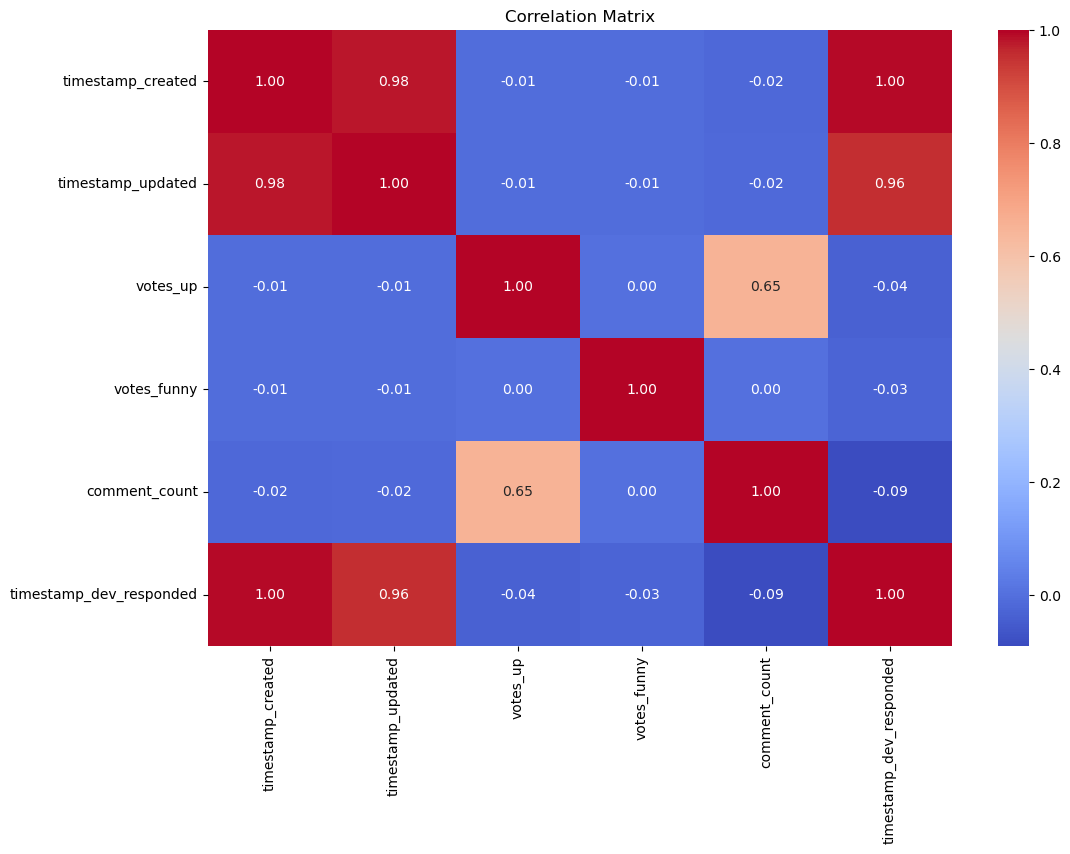

In [12]:
# Calculate correlations between numerical columns
correlation_matrix = parquets_df.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


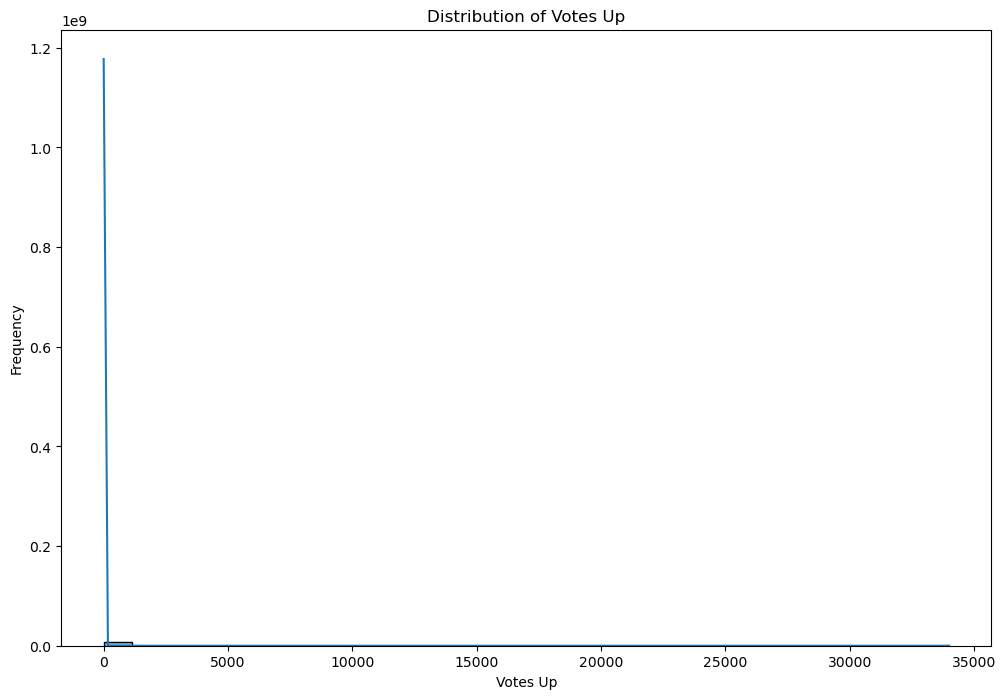

In [18]:
# Check distribution of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data=parquets_df['votes_up'], bins=30, kde=True)
plt.title("Distribution of Votes Up")
plt.xlabel("Votes Up")
plt.ylabel("Frequency")
plt.show()

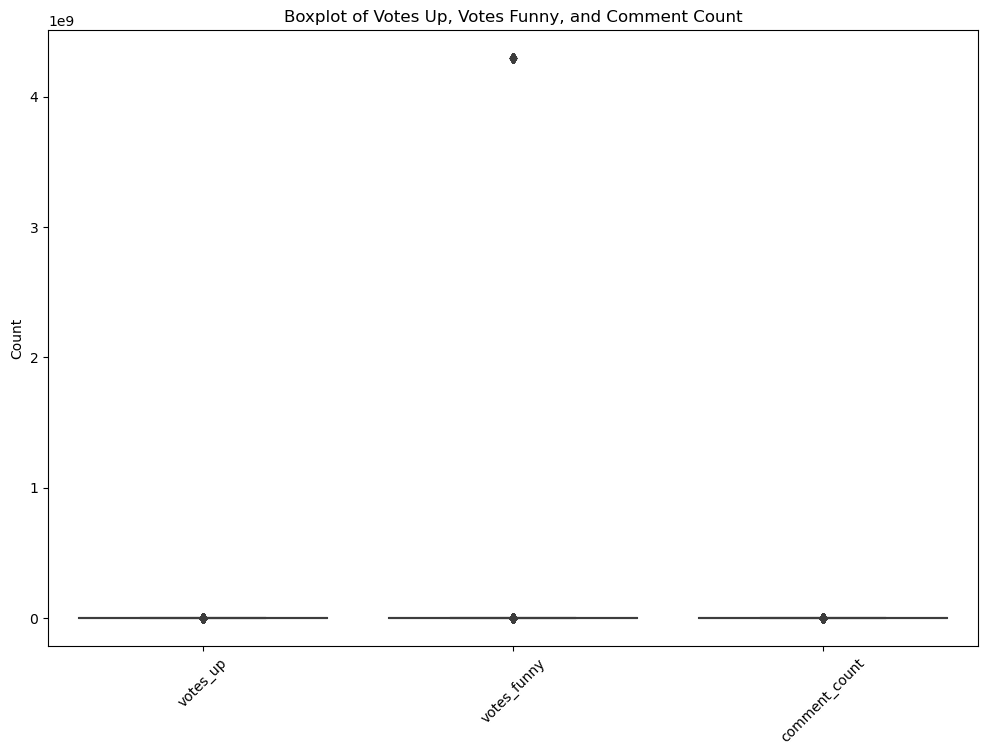

In [19]:
# Boxplot for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=parquets_df[['votes_up', 'votes_funny', 'comment_count']])
plt.title("Boxplot of Votes Up, Votes Funny, and Comment Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


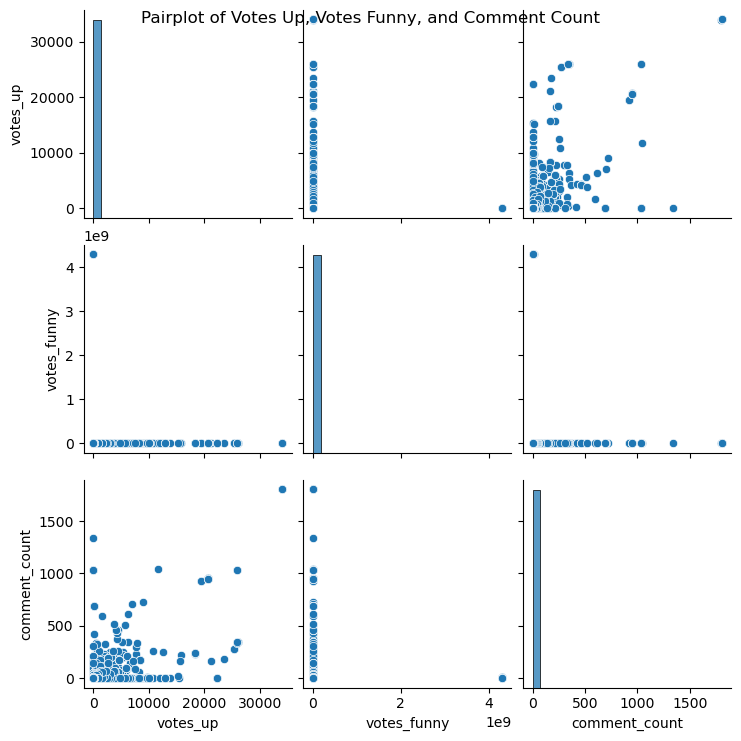

In [20]:
# Pairplot for numerical columns
sns.pairplot(parquets_df[['votes_up', 'votes_funny', 'comment_count']])
plt.suptitle("Pairplot of Votes Up, Votes Funny, and Comment Count")
plt.show()

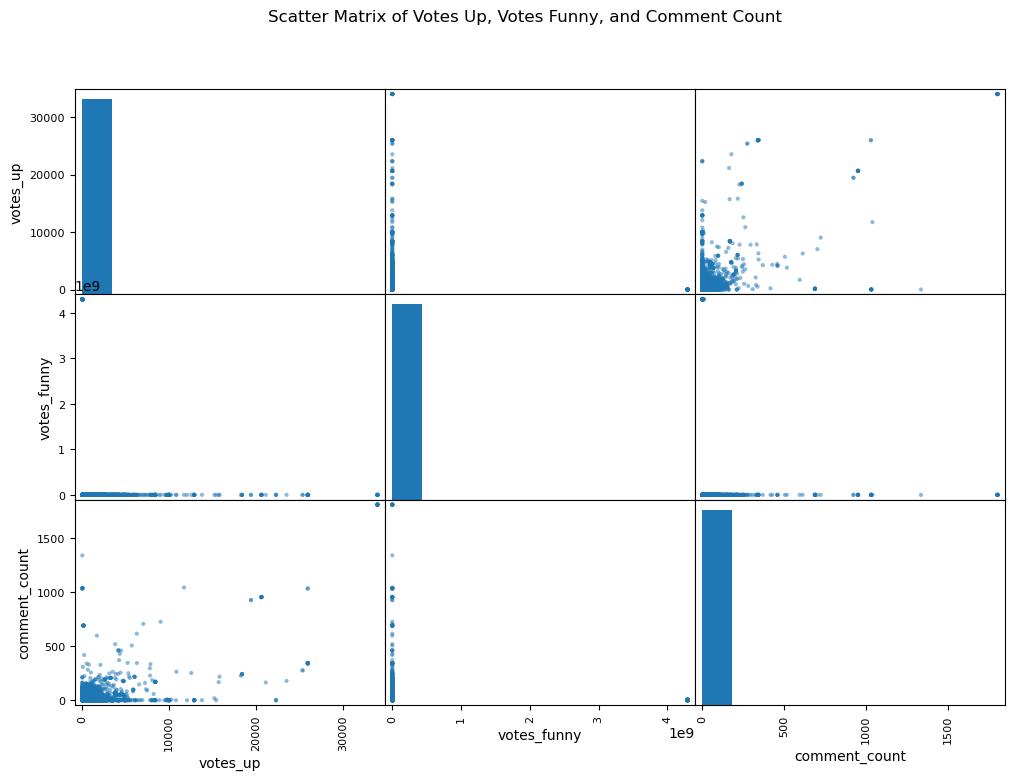

In [21]:
# Scatter matrix for numerical columns
pd.plotting.scatter_matrix(parquets_df[['votes_up', 'votes_funny', 'comment_count']], figsize=(12, 8))
plt.suptitle("Scatter Matrix of Votes Up, Votes Funny, and Comment Count")
plt.show()


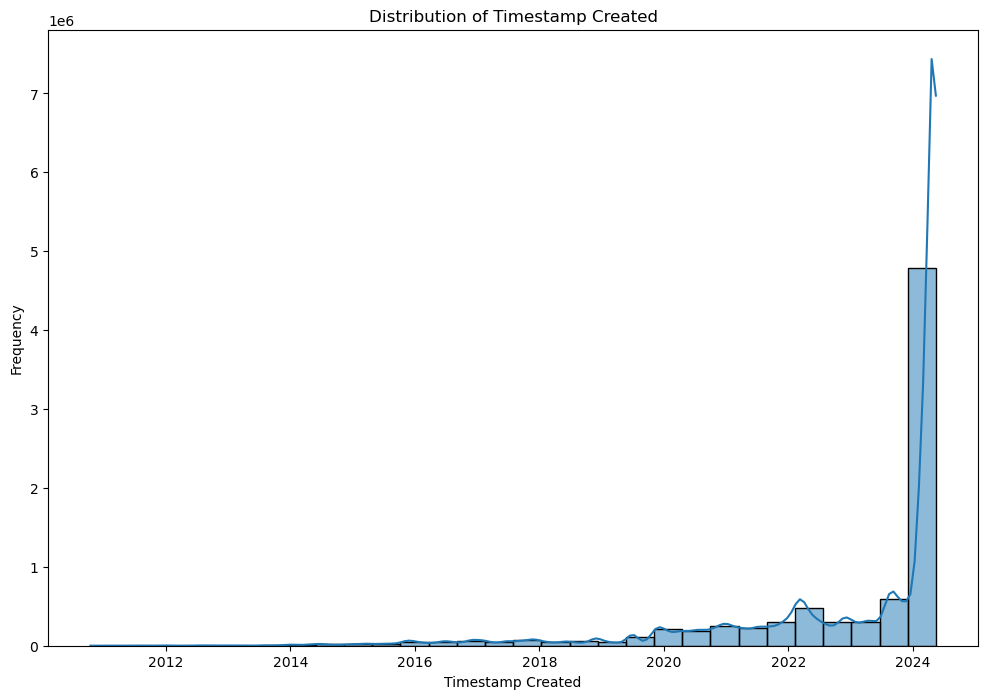

In [22]:
# Distribution of timestamp_created
plt.figure(figsize=(12, 8))
sns.histplot(data=parquets_df['timestamp_created'], bins=30, kde=True)
plt.title("Distribution of Timestamp Created")
plt.xlabel("Timestamp Created")
plt.ylabel("Frequency")
plt.show()


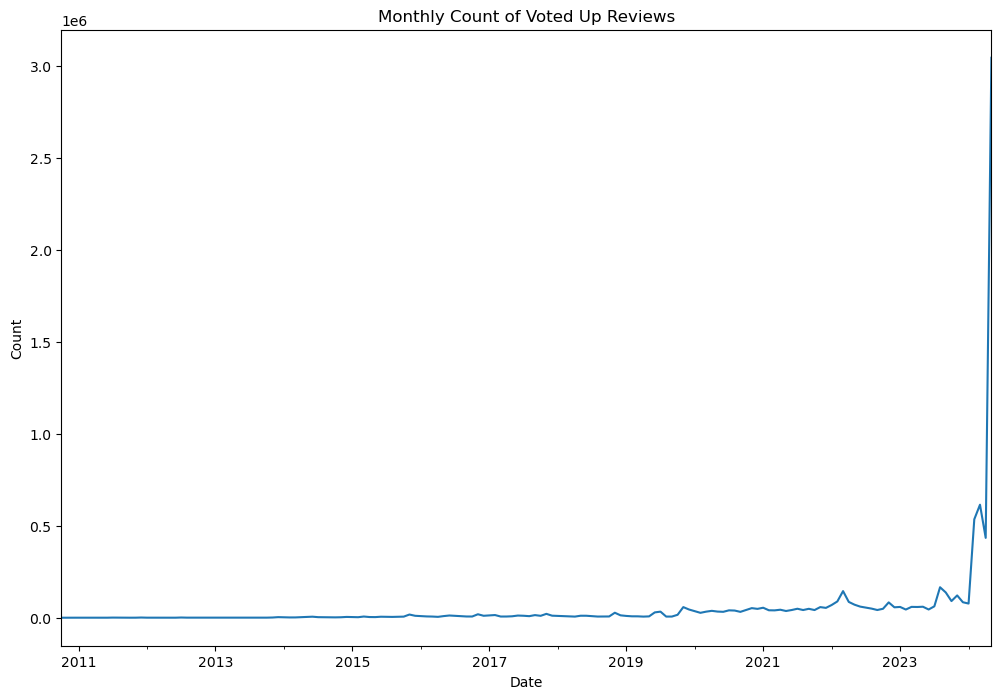

In [25]:
# Time series analysis
parquets_df.set_index('timestamp_created', inplace=True)
plt.figure(figsize=(12, 8))
parquets_df['voted_up'].resample('M').count().plot()
plt.title("Monthly Count of Voted Up Reviews")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [27]:
from wordcloud import WordCloud

# Generate word cloud for reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(parquets_df['review'].dropna()))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Reviews")
plt.axis('off')
plt.show()


MemoryError: 